## Trabajo práctico N°2

Alumna: Clara Bureu

#### Importo las librerías

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import signal

### Parte 1

Text(0.5, 1.0, 'Imagen en escala de grises')

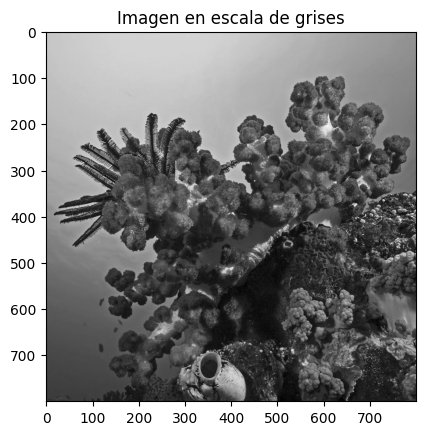

In [28]:
image_gray = cv.imread('coral.png', cv.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap='gray')
plt.title(f'Imagen en escala de grises')

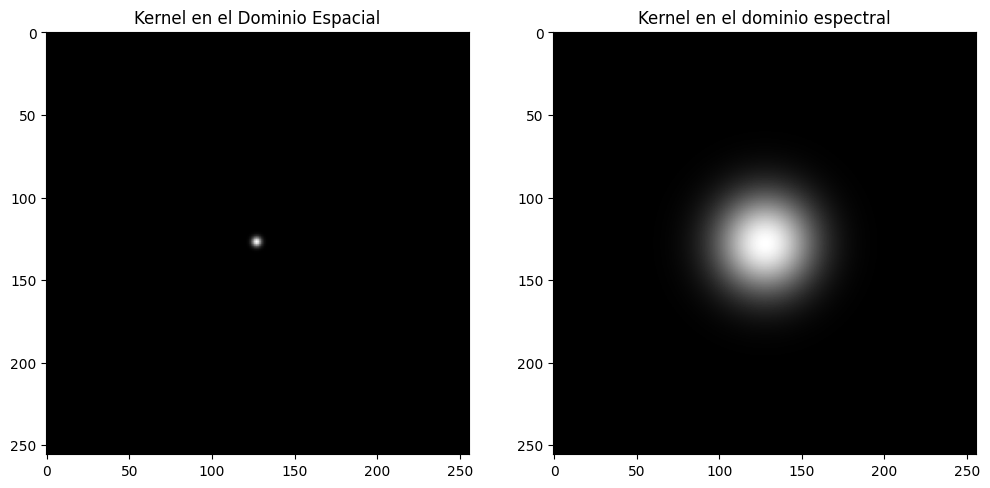

In [29]:
def create_gauss_filter(h, w, k_size, sigma):
    x = cv.getGaussianKernel(k_size, sigma) # Genero un kernel gaussiano en el eje x
    y = cv.getGaussianKernel(k_size, sigma) # Genero un kernel gaussiano en el eje y

    kernel_spatial = signal.convolve2d(y, x.transpose(), mode='full') # Realizo la convolución 2D de los dos kernels para obtener un kernel espacial bidimensional
    pad_w = (w-k_size)//2
    pad_h = (h-k_size)//2
    kernel_spatial = np.pad(kernel_spatial, pad_width=((pad_h,pad_h+1),(pad_w,pad_w+1)), mode='constant', constant_values=0) #Calculo el tamaño del relleno necesario para que el kernel coincida con la imagen de entrada
    ker_spectral = np.fft.fft2(kernel_spatial) # Realizo la transformada de Fourier 2D del kernel espacial para obtener el kernel en el dominio de la frecuencia

    return kernel_spatial, ker_spectral

h, w = 256, 256  
k_size = 21     
sigma = 2.0     

kernel_spacial, ker_spectral = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(kernel_spacial, cmap='gray')
plt.title('Kernel en el Dominio Espacial')
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(np.abs(ker_spectral)), cmap='gray')
plt.title('Kernel en el dominio espectral')
plt.show()

In [30]:
def apply_gauss_filter(image, gauss_filter):
    img_fft = np.fft.fft2(image) # Realizo la transformada de Fourier 2D de la imagen de entrada
    img_fft = img_fft * gauss_filter  # Multiplico la transformada de Fourier de la imagen por el kernel en el dominio de la frecuencia (gauss_filter)
    return np.fft.ifftshift(np.real(np.fft.ifft2(img_fft))) # Esto devuelve la imagen filtrada en el dominio espacial

In [31]:
h, w = image_gray.shape
sigmas = [1.0, 3.0, 5.0]  # Valores de sigma
kernel_sizes = [5, 11, 21]  # Tamaños de kernel

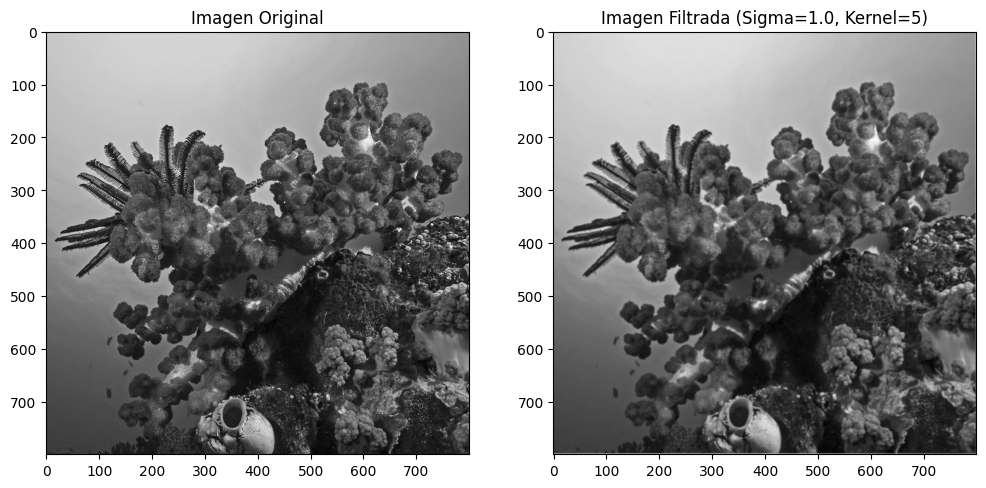

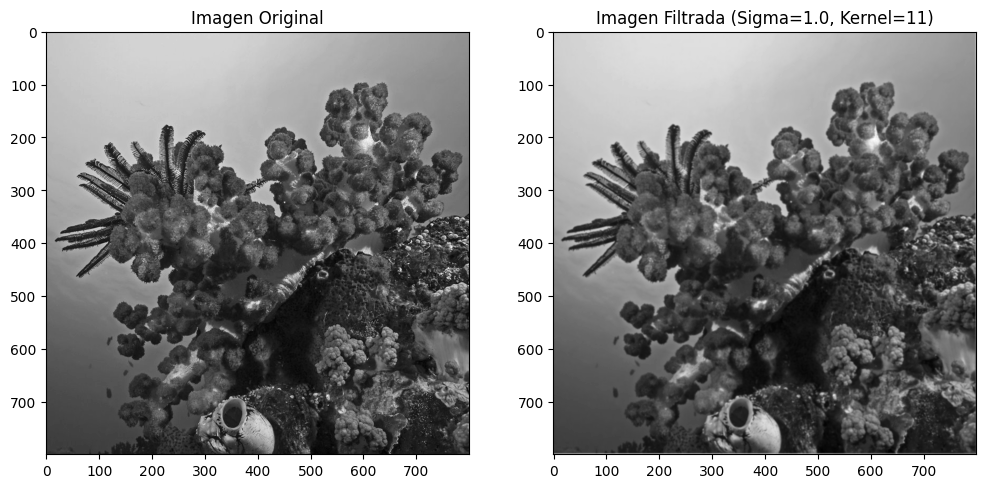

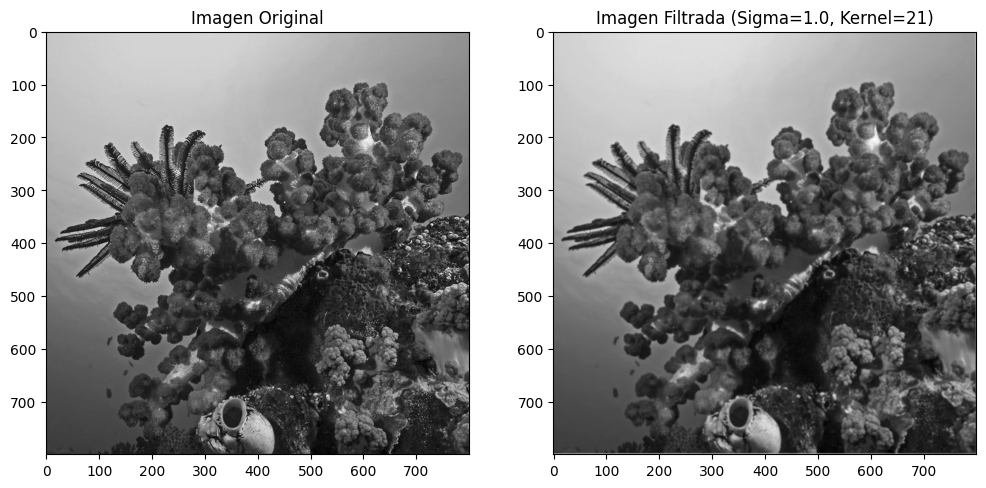

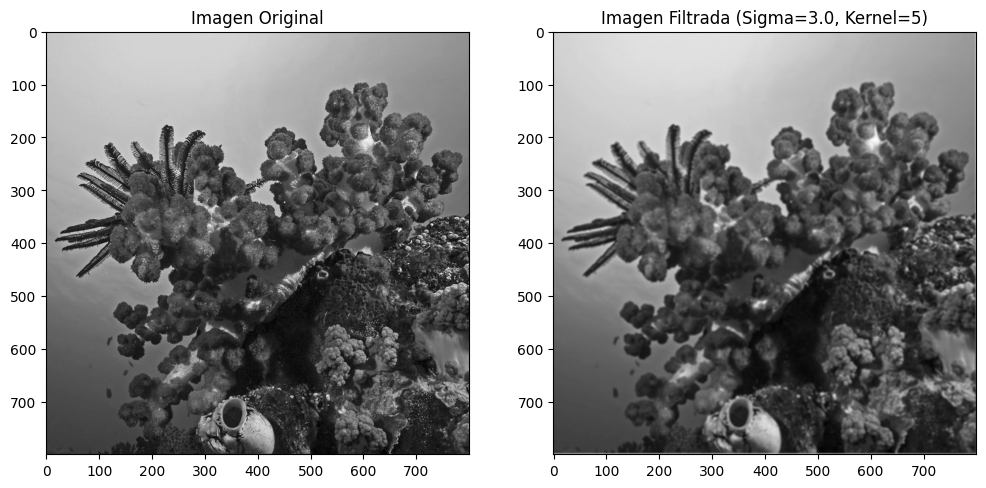

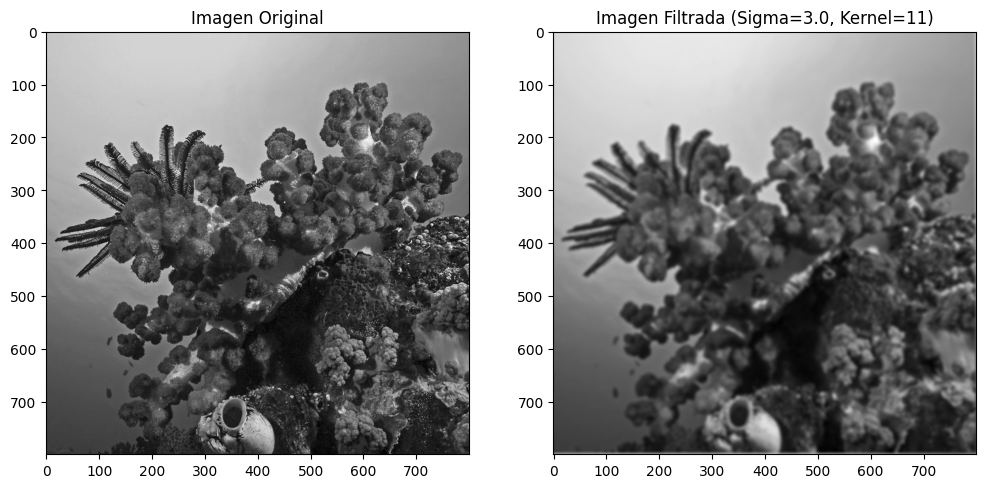

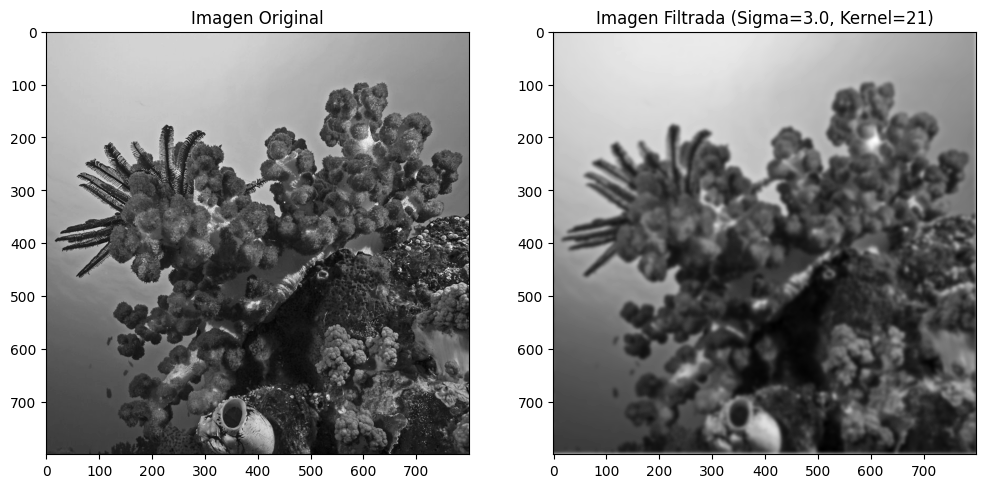

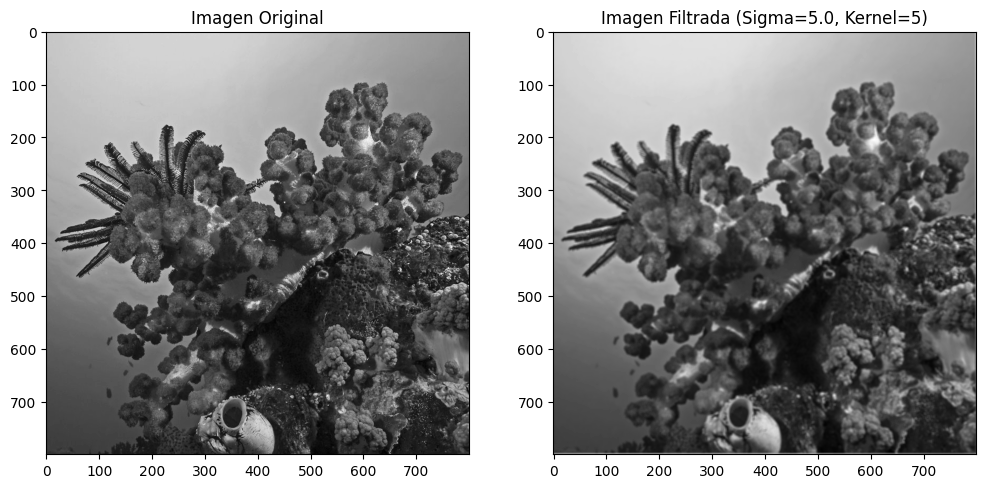

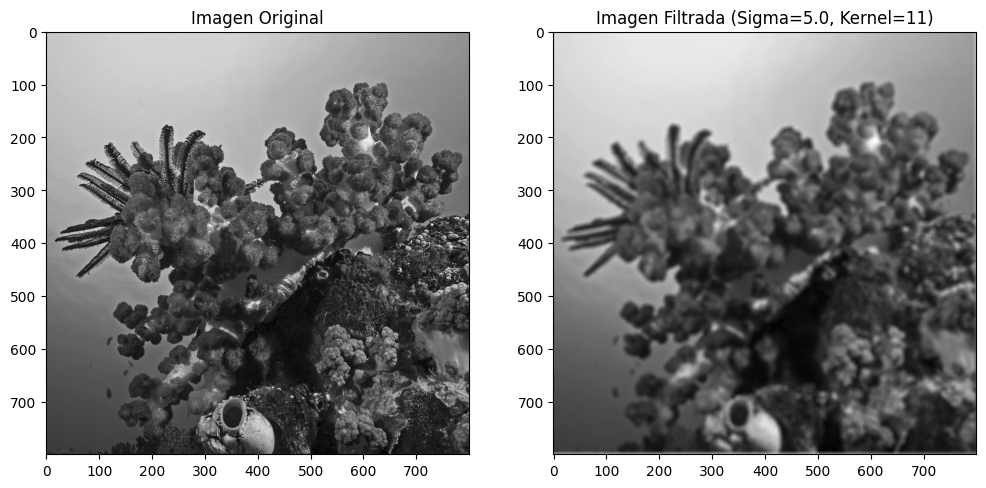

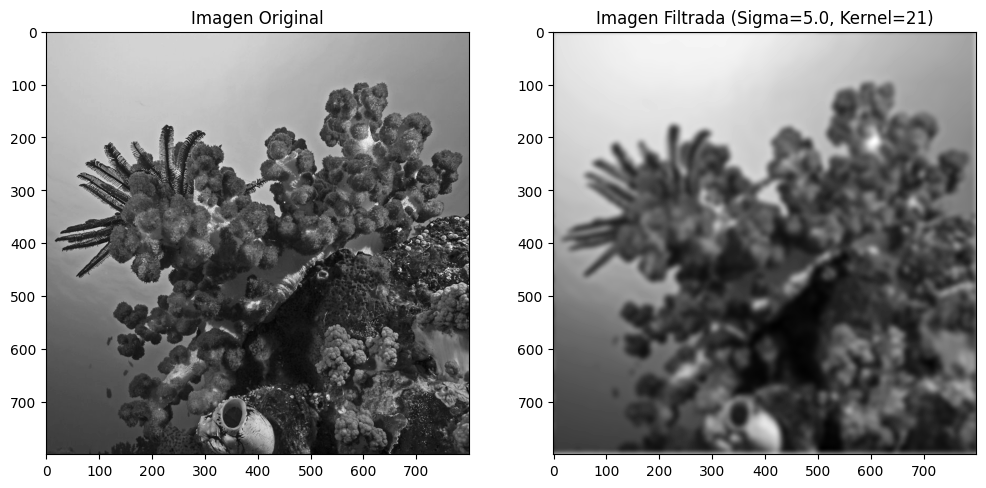

In [32]:
for sigma in sigmas:
    for k_size in kernel_sizes:
        gauss_filter, gauss_filter_fft = create_gauss_filter(h, w, k_size, sigma)
        filtered_image = apply_gauss_filter(image_gray, gauss_filter_fft)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image_gray, cmap='gray')
        plt.title(f'Imagen Original')
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Imagen Filtrada (Sigma={sigma}, Kernel={k_size})')
        plt.show()

### Parte 2

In [40]:
def Image_Quality(I):
    Fc = np.fft.fftshift(np.fft.fft2(I))
    AF = np.abs(Fc)
    M = np.max(AF)
    Th = AF[AF > M / 1000].size
    FM = Th / I.size

    return FM

In [43]:
h_fm, w_fm = image_gray.shape
ker_size_fm = 1
ker_sigma_fm = 5
gauss_filter_fm, gauss_filter_fft_fm = create_gauss_filter(h_fm, w_fm, ker_size_fm, ker_sigma_fm)
filtered_spectral_fm = apply_gauss_filter(image_gray, gauss_filter_fft_fm)
filtered_spatial_fm = cv.filter2D(src=image_gray, ddepth=-1, kernel=gauss_filter_fm)

Text(0.5, 1.0, 'Filtadro espectral- FM=0.0152796875')

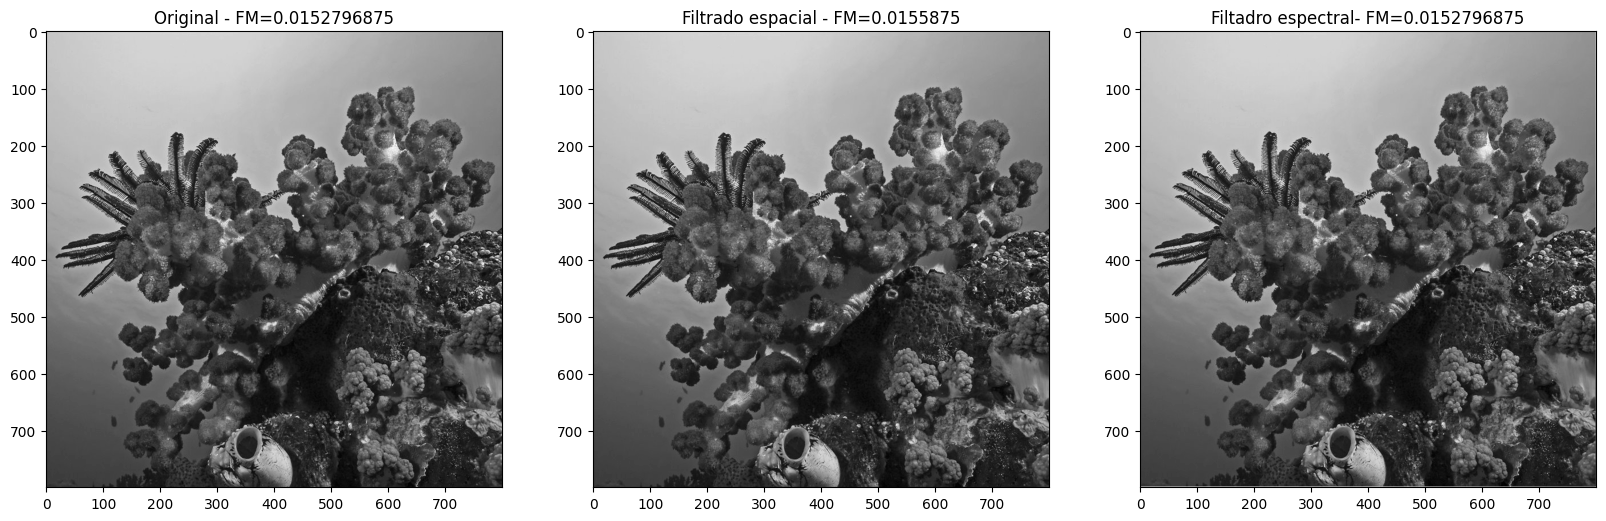

In [45]:
plt.figure(figsize=(20,13))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.title(f'Original - FM={Image_Quality(img)}')
plt.subplot(1,3,2)
plt.imshow(filtered_spatial_fm, cmap='gray')
plt.title(f'Filtrado espacial - FM={Image_Quality(filtered_spatial_fm)}')
plt.subplot(1,3,3)
plt.imshow(filtered_spectral_fm, cmap='gray')
plt.title(f'Filtadro espectral- FM={Image_Quality(filtered_spectral_fm)}')

### Parte 3

##### A.1. Momento central absoluto (MIS1)

In [50]:
def absolute_central_moment(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256]) # Calculo el histograma de la imagen
    total_pixels = np.sum(hist) # Calculo el número total de píxeles en la imagen
    m = np.mean(image) # Calculo el valor medio (m) del histograma
    acmo = np.sum([(k - m) * (freq / total_pixels) for k, freq in enumerate(hist)]) # Calculo el ACMo según la ecuación (A.1)

    return acmo

In [51]:
h_acmo, w_acmo = image_gray.shape
ker_size_acmo = 1
ker_sigma_acmo = 5
gauss_filter_acmo, gauss_filter_fft_acmo = create_gauss_filter(h_acmo, w_acmo, ker_size_acmo, ker_sigma_acmo)
filtered_spectral_acmo = apply_gauss_filter(image_gray, gauss_filter_fft_acmo)
filtered_spatial_acmo = cv.filter2D(src=image_gray, ddepth=-1, kernel=gauss_filter_acmo)

Text(0.5, 1.0, 'Filtadro espectral- ACMo=-0.32006033100931575')

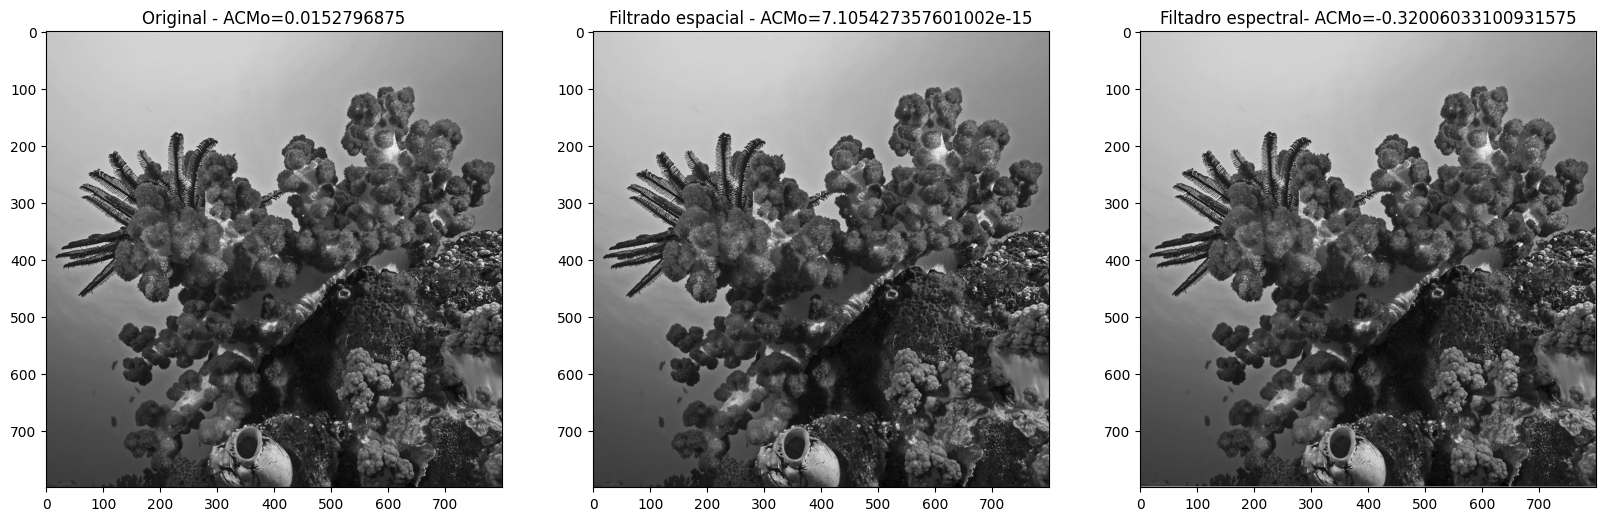

In [53]:
plt.figure(figsize=(20,13))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.title(f'Original - ACMo={Image_Quality(image_gray)}')
plt.subplot(1,3,2)
plt.imshow(filtered_spatial_acmo, cmap='gray')
plt.title(f'Filtrado espacial - ACMo={absolute_central_moment(filtered_spatial_acmo)}')
plt.subplot(1,3,3)
plt.imshow(filtered_spectral_acmo, cmap='gray')
plt.title(f'Filtadro espectral- ACMo={absolute_central_moment(filtered_spectral_acmo)}')